# Correlation

## Introduction

In biology, it's often crucial to understand how different variables relate to each other. Does the abundance of a particular species increase with temperature? Is there a relationship between gene expression levels and disease severity? Correlation analysis provides the tools to quantify these relationships.

This chapter explores correlation, a statistical method for measuring the strength and direction of the association between two continuous variables. We'll focus on Pearson correlation, which quantifies the linear relationship between variables. It's important to remember that **correlation** is distinct from **regression** (covered in the next chapter). While regression analyzes how one variable predicts another, correlation simply assesses the degree to which they move together. In correlation, X and Y are interchangeable, unlike in regression.

While correlation assesses the general relationship between two variables, there are cases where we want to evaluate the agreement between two methods measuring the same quantity. For example, we might compare a new, less expensive assay to a gold-standard method. In these situations, [Bland-Altman plots](https://en.wikipedia.org/wiki/Bland%E2%80%93Altman_plot) are a valuable tool, but won't be discussed in this chapter, but the `pingouin` package offers a [convenient function for comparing visually two sets of measurements](https://pingouin-stats.org/build/html/generated/pingouin.plot_blandaltman.html#r5bbb6e366078-2).

We'll begin this chapter by visualizing relationships with scatter plots and exploring different types of correlation.  Next, we'll delve into the assumptions underlying correlation analysis, including linearity, normality, and the absence of outliers. We'll then introduce various measures of correlation, including covariance, Pearson's *r*, Spearman's rank correlation, and Kendall's rank correlation, providing Python code examples for their calculation.

The chapter will also cover statistical inference for correlation, including hypothesis testing to determine if a correlation is significantly different from zero, and methods for calculating confidence intervals. We'll explore both parametric approaches and bootstrapping, demonstrating their implementation in Python.

Finally, we'll emphasize the crucial distinction between correlation and causation, illustrating this concept with biologically relevant examples. By the end of this chapter, you'll have a solid understanding of correlation analysis and be equipped to apply it to your own biological research using Python.

## Definitions

### What is correlation?

Correlation is a statistical measure that describes the strength and direction of the relationship between two continuous variables. In simpler terms, it tells us how strongly two things are related and whether they tend to move together in the same direction or in opposite directions.

Imagine you're observing the height and weight of a group of people. You might notice that taller individuals generally weigh more. This suggests a positive correlation between height and weight - as one increases, the other tends to increase as well. Conversely, if you were looking at the relationship between exercise frequency and resting heart rate, you might find a negative correlation - people who exercise more often tend to have lower resting heart rates.

### Types of correlation

Correlation is a powerful tool because it allows us to quantify these relationships. Correlation can be classified into three main types based on the direction and strength of the relationship, with the **correlation coefficient**, often denoted by __*r*__, expressing this relationship as a number ranging **from -1 to +1**:

- Positive correlation ($0 \lt r \le 1$): as one variable increases, the other tends to increase as well. A perfect positive correlation is represented by a correlation coefficient of +1, e.g., height and weight, study time and exam scores.
- Negative correlation ($-1 \le r \lt 0$): as one variable increases, the other tends to decrease. A perfect negative correlation has a coefficient of -1, e.g., exercise and resting heart rate, stress and immune function.
- No correlation ($r=0$): there is no apparent linear relationship between the variables. The correlation coefficient is close to 0, indicating that changes in one variable don't reliably predict changes in the other, e.g., shoe size and IQ, hair color and favorite movie genre.

When two variables show a very large correlation, one can be said to be a **predictor** of the other, in the sense that knowing the value of one of the two variable allows us to make a reasonnable guess about the value of the second variable. Another way of looking at this relationship is to see those variable as redundant, in the sense that they carry the same information: knowing the value of both variable does not bring much more insight compared to knowing the value of only one.

### Applications in biology

Correlation analysis has numerous applications in biological research, including:

- Gene expression analysis: identifying correlations between the expression levels of different genes to understand regulatory networks and pathways.
- Ecology: studying the relationship between species abundance and environmental factors like temperature or rainfall.
- Drug discovery: examining the correlation between drug dosage and therapeutic effect or side effects.
- Evolutionary biology:investigating the correlation between morphological traits and environmental pressures.
- Epidemiology: exploring the correlation between lifestyle factors (diet, exercise) and disease risk.

By understanding and quantifying these relationships, biologists can gain valuable insights into complex biological processes and phenomena.

## Descriptive statistics and visualization

To illustrate the concepts of correlation and how to explore relationships between variables, we'll use data from a study by [Borkman and colleagues](https://pubmed.ncbi.nlm.nih.gov/8418404/). They investigated the link between the fatty-acid composition of skeletal-muscle phospholipids and insulin sensitivity. Their research involved two groups of subjects, but we will focus on the group of 13 normal men, where insulin sensitivity was assessed using euglycemic-clamp studies, with muscle biopsies taken from the vastus lateralis. Specifically, we'll examine the relationship between insulin sensitivity and the percentage of C20-22 fatty acids in the muscle phospholipids, as summarized in Table 32.1 on page 319 from "Intuitive Biostatistics 4th Edition".

In [1]:
import pandas as pd

# Example data from the book, page 319 (directly into a DataFrame)
df = pd.DataFrame({
    # percentage of C20-22 fatty acids
    'per_C2022_fatacids': [17.9, 18.3, 18.3, 18.4, 18.4, 20.2, 20.3, 21.8, 21.9, 22.1, 23.1, 24.2, 24.4],
    # insulin sensitivity index
    'insulin_sensitivity': [250, 220, 145, 115, 230, 200, 330, 400, 370, 260, 270, 530, 375],
})

df.head()

,per_C2022_fatacids,insulin_sensitivity
0,17.9,250
1,18.3,220
2,18.3,145
3,18.4,115
4,18.4,230


### Descriptive statistics

A crucial first step in any correlation analysis is to explore the data visually and through descriptive statistics. This allows us to identify potential patterns, outliers, and the overall distribution of the variables, which can inform our subsequent analysis and interpretation.

In [2]:
# Display descriptive statistics using pandas' describe()
print("Descriptive statistics using pandas:")
df.describe()

Descriptive statistics using pandas:


,per_C2022_fatacids,insulin_sensitivity
count,13.000000,13.000000
mean,20.715385,284.230769
std,2.356850,113.886752
min,17.900000,115.000000
25%,18.400000,220.000000
50%,20.300000,260.000000
75%,22.100000,370.000000
max,24.400000,530.000000


In [3]:
from scipy.stats import describe

# Display additional statistics using scipy
print("Additional Statistics using scipy:")
print("Insulin Sensitivity:\n", describe(df['insulin_sensitivity']))
print("\n%C20-20 fatty acids:\n", describe(df['per_C2022_fatacids']))

Additional Statistics using scipy:
Insulin Sensitivity:
 DescribeResult(nobs=13, minmax=(115, 530), mean=284.2307692307692, variance=12970.192307692307, skewness=0.5429430677319255, kurtosis=-0.19429352446593473)

%C20-20 fatty acids:
 DescribeResult(nobs=13, minmax=(17.9, 24.4), mean=20.71538461538461, variance=5.55474358974359, skewness=0.2382148683128159, kurtosis=-1.3626759485656732)


### Visualization

(scatter_plot)=
### Scatter plots

Scatter plots are a fundamental tool for visualizing the relationship between two continuous variables. They provide an intuitive way to grasp the strength and direction of a correlation by displaying the data as a collection of points on a two-dimensional graph.

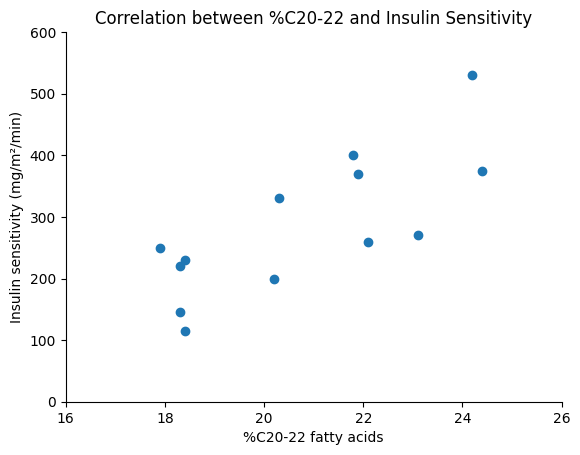

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(df['per_C2022_fatacids'], df['insulin_sensitivity'])

plt.title('Correlation between %C20-22 and Insulin Sensitivity')
plt.xlabel('%C20-22 fatty acids')
plt.ylabel('Insulin sensitivity (mg/m²/min)')
plt.axis((16, 26, 0, 600))
sns.despine();

Observing the scatter plot, we can see an upward trend in the data points. This indicates that individuals with higher percentages of C20-22 fatty acids in their muscle tissue tend to have higher insulin sensitivity. While there is some variability, the overall pattern suggests a positive association between these two variables.

### Correlation matrices and heatmaps

Scatter plots are excellent for visualizing the relationship between two variables. However, biological datasets often contain many variables, and we might be interested in exploring the relationships between all possible pairs. For this purpose, we can use correlation matrices and heatmaps, which provide a concise overview of the correlations between **multiple variables**.

A **correlation matrix** is a table that displays the correlation coefficients between all pairs of variables in a dataset. Each row and column represents a variable, and the cells at the intersection show the corresponding correlation coefficient. We'll delve deeper into the meaning and calculation of these correlation coefficients in the next section.

A **heatmap** is a graphical representation of a correlation matrix, where the values of the correlation coefficients are represented by colors. Typically, a gradient of colors is used, with warmer colors (e.g., red) indicating stronger positive correlations, cooler colors (e.g., blue) indicating stronger negative correlations, and lighter colors (e.g., white or pale yellow) indicating weak or no correlation.

Heatmaps make it easy to identify patterns of correlation at a glance. For example, we can quickly spot clusters of variables that are highly correlated with each other or identify variables that are negatively correlated with most other variables. Let's illustrate this concept using the [Palmer penguins dataset introduced in a previous chapter](https://sbwiecko.github.io/intuitive_biostatistics/30%20-%20Comparing%20Two%20Unpaired%20Means.html#working-with-real-world-data).

In [5]:
import pingouin as pg

# List all available datasets in pingouin (commented out)
# pg.list_dataset()

# Load the 'penguins' dataset
penguins = pg.read_dataset('penguins')

# Display the first 5 rows of the dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Biscoe,37.8,18.3,174.0,3400.0,female
1,Adelie,Biscoe,37.7,18.7,180.0,3600.0,male
2,Adelie,Biscoe,35.9,19.2,189.0,3800.0,female
3,Adelie,Biscoe,38.2,18.1,185.0,3950.0,male
4,Adelie,Biscoe,38.8,17.2,180.0,3800.0,male


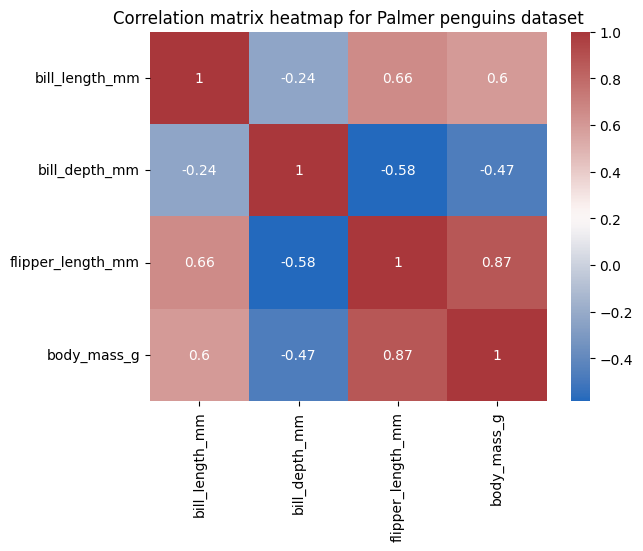

In [6]:
# Calculate the correlation matrix (excluding non-numeric columns)
corr_matrix = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='vlag')
plt.title('Correlation matrix heatmap for Palmer penguins dataset');

## Assumptions of correlation analysis

Before we delve into the calculation and interpretation of correlation coefficients, it's essential to understand the assumptions that underlie correlation analysis. These assumptions are crucial because violating them can lead to misleading or inaccurate results.

In this section, we'll examine the key assumptions of correlation analysis, focusing primarily on [Pearson's correlation coefficient](pearson), as it is the most commonly used method and has more stringent assumptions compared to non-parametric alternatives like [Spearman](spearman) and [Kendall](kandall):

- **Linearity:** Pearson's correlation measures the strength of a linear relationship. This means that the relationship between the two variables should roughly follow a straight line pattern.
- **Normality:** for hypothesis testing with Pearson's correlation, the data should be approximately normally distributed. This assumption is less critical for estimating the correlation coefficient itself but becomes important when assessing statistical significance.
- **Homoscedasticity:** this assumption refers to the equal spread of data points across the range of values for both variables. In other words, the variability of one variable should be roughly the same across all values of the other variable.
- **No outliers:** outliers, which are extreme data points that deviate significantly from the rest of the data, can have a disproportionate influence on the correlation coefficient.

### Linearity

The most important assumption for Pearson's correlation is linearity. This means that the relationship between the two variables should be linear. In other words, if we were to plot the variables on a scatter plot, we should be able to draw a straight line through the points that captures the general trend of the data.

To assess linearity, the primary tool is the [scatter plot](scatter_plot). By examining the scatter plot of insulin sensitivity and C20-20 fatty acids that we created earlier, we can see that the points appear to cluster around a straight line, supporting the assumption of linearity.

While the scatter plot provides a visual assessment, we can also calculate the Pearson correlation coefficient ($r$). We will see in the next section that a high absolute value of $r$ (e.g., above 0.7) can provide further support for a linear relationship. For a more detailed analysis, we can create a residual plot. This involves plotting the **residuals** (the differences between the observed values and the values predicted by a linear regression line) against the predicted values. If the residuals are randomly scattered around zero, it supports the linearity assumption. If there are clear patterns in the residuals, it suggests non-linearity.

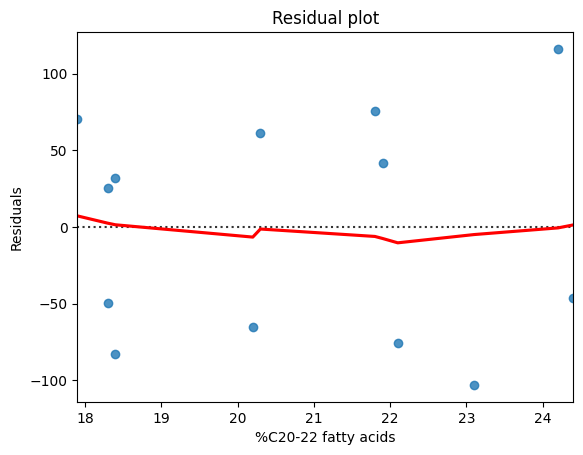

In [7]:
# Fit a linear regression model using Pingouin
model = pg.linear_regression(
    df['per_C2022_fatacids'],
    df['insulin_sensitivity'],
    # remove_na=True,
)

# Extract the residuals using the residuals_ attribute
residuals = model.residuals_

# Create a residual plot
sns.residplot(
    x=df['per_C2022_fatacids'],
    y=residuals,
    lowess=True,  # Adding a smooth curve to visualize the trend of the residuals
    line_kws=dict(color="r"))
plt.title('Residual plot')
plt.xlabel('%C20-22 fatty acids')
plt.ylabel('Residuals');

If the relationship appears non-linear, we have a few options:

- **Transformations**: we may consider applying transformations to the data (e.g., logarithmic, square root, or reciprocal transformations) to see if we can *linearize* the relationship.
- **Non-parametric** methods: we can use non-parametric correlation coefficients like [Spearman's rank correlation](spearman) or [Kendall's tau](kendall), which don't require the assumption of linearity.

### Normality

The normality assumption in the context of correlation analysis refers to the assumption that *both variables being analyzed are approximately normally distributed*. This means that the distribution of the data points for each variable should roughly follow a bell-shaped curve.

The normality assumption is particularly important when we want to perform *hypothesis tests* to determine the statistical significance of the correlation. Many common statistical tests for correlation rely on the assumption of normality. Normality is also assumed when calculating confidence intervals for the correlation coefficient.

There are several methods to assess the normality of the data, as discussed in more details in [a previous chapter](https://sbwiecko.github.io/intuitive_biostatistics/24%20-%20Normality%20Tests%20and%20Outliers.html).

Visual inspection includes:

- Histograms: we can create histograms for each variable. A histogram provides a visual representation of the distribution of the data, allowing us to see [if it resembles a bell-shaped curve](https://sbwiecko.github.io/intuitive_biostatistics/24%20-%20Normality%20Tests%20and%20Outliers.html#variability-of-gaussian-samples).
- Q-Q plots: we can also generate [Q-Q plots (quantile-quantile plots)](https://sbwiecko.github.io/intuitive_biostatistics/24%20-%20Normality%20Tests%20and%20Outliers.html#q-q-plots) for each variable. A Q-Q plot compares the quantiles of the data to the quantiles of a normal distribution. If the data is normally distributed, the points on the Q-Q plot should fall approximately along a straight line.

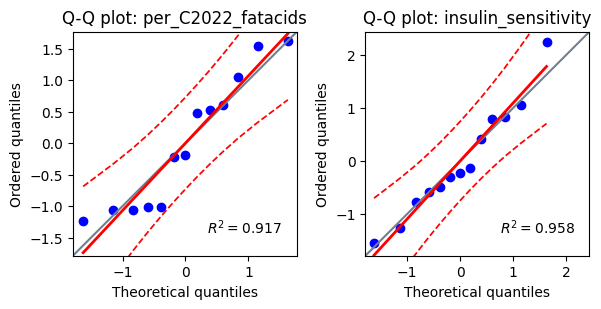

In [8]:
# Plotting Q-Q plots
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

for i, data in enumerate(df.columns):
    pg.qqplot(
        df[data],
        dist='norm', # compare the data against the normal distribution
        ax=axes[i],
        confidence=0.95, # Add 95% confidence intervals
    )
    axes[i].set_title(f"Q-Q plot: {data}")

plt.tight_layout();

We can also leverage statistical tests:

- [D'Agostino-Pearson omnibus K²](https://sbwiecko.github.io/intuitive_biostatistics/24%20-%20Normality%20Tests%20and%20Outliers.html#d-agostino-pearson-omnibus-k2-normality-test) and [Shapiro-Wilk](https://sbwiecko.github.io/intuitive_biostatistics/24%20-%20Normality%20Tests%20and%20Outliers.html#shapiro-wilk-test) tests: this are widely used statistical tests specifically designed to assess normality. They test the null hypothesis that the data is drawn from a normal distribution.
- [Kolmogorov-Smirnov test](https://sbwiecko.github.io/intuitive_biostatistics/24%20-%20Normality%20Tests%20and%20Outliers.html#kolmogorov-smirnov-test): this is another test for normality, but it's generally less powerful than the Shapiro-Wilk test.

In [9]:
print("Shapiro-Wilk test for normality:")
print(pg.normality(df['per_C2022_fatacids']))
print(pg.normality(df['insulin_sensitivity']))

Shapiro-Wilk test for normality:
                           W      pval  normal
per_C2022_fatacids  0.890774  0.099953    True
                           W      pval  normal
insulin_sensitivity  0.96256  0.792641    True


If the normality assumption is violated, we have several options:

- Transformations: we may consider applying transformations to the data (e.g., logarithmic, square root) to see if we can normalize the distribution.
- Non-parametric methods: we could use non-parametric correlation coefficients like [Spearman's rank correlation](spearman) or [Kendall's tau](kendall), which do not require the assumption of normality.
- [Permutation tests](permutations): these are resampling-based methods that can be used to test the significance of the correlation without relying on distributional assumptions.

### Homoscedasticity

The assumption of **homoscedasticity** (also known as homogeneity of variance) refers to the equal spread of data points across the range of values for both variables. In simpler terms, the variability of one variable should be roughly the same across all values of the other variable.

Homoscedasticity is important for obtaining reliable estimates of the correlation coefficient. When the variability of one variable changes significantly across the range of the other variable, it can distort the correlation estimate. Violations of homoscedasticity can also affect the accuracy of hypothesis tests for correlation.

The most common way to assess homoscedasticity is to examine the scatter plot of the two variables, looking for any *patterns in the spread* of the data points. If the spread of the points is roughly consistent across the range of values, it suggests homoscedasticity. If the spread appears to change (e.g., fanning out or narrowing in), it indicates heteroscedasticity (non-constant variance).

Statistical tests can also be leveraged, as shown in [the chapter compairing unpaired means](https://sbwiecko.github.io/intuitive_biostatistics/30%20-%20Comparing%20Two%20Unpaired%20Means.html#homoscedasticity-testing). For example, Levene's test is a statistical test specifically designed to assess the equality of variances between groups. In the context of correlation, we can *divide the data into groups* based on the values of one variable and then test for equal variances in the other variable across those groups. Bartlett's test is another test for equality of variances, but it's more sensitive to deviations from normality.

In [10]:
# Divide the data into groups based on %C20-22 fatty acids
cutoff = df['per_C2022_fatacids'].median()  # Use of the median as a cut-off
low_fatacids = df['insulin_sensitivity'][df['per_C2022_fatacids'] <= cutoff].to_numpy()
high_fatacids = df['insulin_sensitivity'][df['per_C2022_fatacids'] > cutoff].to_numpy()

# Levene's test for homoscedasticity
print("Levene's test for homoscedasticity:")
pg.homoscedasticity([low_fatacids, high_fatacids], method='levene')

Levene's test for homoscedasticity:


,W,pval,equal_var
levene,0.319637,0.583173,True


If the homoscedasticity assumption is violated, we can consider these options:

- Transformations: transformations of the data (e.g., logarithmic, square root) might help stabilize the variance and reduce heteroscedasticity.
- Non-parametric methods: non-parametric correlation coefficients like Spearman or Kendall are less sensitive to violations of homoscedasticity.
- Other robust correlation methods: there are other robust correlation methods available that are less affected by heteroscedasticity, e.g., Winsorized correlation, biweight midcorrelation, percentage bend correlation, gamma correlation, etc. as [summarized elsewhere](https://cloud.r-project.org/web/packages/correlation/vignettes/types.html).

### Outliers

[As shown previously](https://sbwiecko.github.io/intuitive_biostatistics/24%20-%20Normality%20Tests%20and%20Outliers.html#outliers), **outliers** are data points that deviate significantly from the overall pattern of the data. They can have a disproportionate influence on the correlation coefficient, potentially leading to misleading results.

Outliers can either inflate or deflate the correlation coefficient, giving a false impression of the true relationship between the variables. The presence of outliers can also lead to incorrect conclusions about the strength and direction of the correlation.

We can carefully examine the scatter plot for any data points that are far removed from the main cluster of points. These are potential outliers. Boxplots can also help identify outliers by visually displaying the interquartile range (IQR) and any points that fall outside of the "whiskers" of the boxplot.

Statistical methods include:

- Z-scores: calculate the z-score for each data point. Data points with a z-score above a certain threshold (e.g., 2 or 3) can be considered potential outliers.
- IQR method: identify outliers as data points that fall below (Q1 - 1.5 * IQR) or above (Q3 + 1.5 * IQR), where Q1 and Q3 are the first and third quartiles, respectively.
- Grubb's, Dixon's Q, and other detection methods, as described in [the chapter about normality and outliers](https://sbwiecko.github.io/intuitive_biostatistics/24%20-%20Normality%20Tests%20and%20Outliers.html#statistical-outlier-detection).

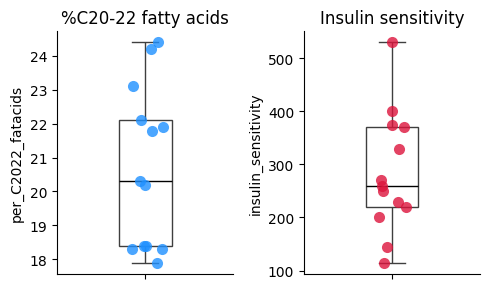

In [11]:
# Create separate boxplots for each variable to respect each scale
plt.figure(figsize=(5, 3))

plt.subplot(1, 2, 1)
sns.stripplot(
    y=df['per_C2022_fatacids'],
    size=8,
    color='dodgerblue',
    alpha=0.8)
sns.boxplot(
    y=df['per_C2022_fatacids'],
    width=0.3,
    boxprops={'facecolor': 'none'},  # Make the boxplot transparent
    medianprops={'color': 'black'})
plt.title('%C20-22 fatty acids')

plt.subplot(1, 2, 2)
sns.stripplot(
    y=df['insulin_sensitivity'],
    size=8,
    color='crimson',
    alpha=0.8)
sns.boxplot(
    y=df['insulin_sensitivity'],
    width=0.3,
    boxprops={'facecolor': 'none'},
    medianprops={'color': 'black'})
plt.title('Insulin sensitivity')

plt.xticks()
plt.tight_layout()
sns.despine();

## Measures of correlation

In this section, we'll introduce different measures of correlation, each with its own way of capturing the relationship between variables.

### Covariance

**Covariance** measures the extent to which two variables change together. If $x = x_1, x_2, \dots, x_n$ and $y = y_1, y_2, \dots, y_n$ represent two variables, $\bar{x}$ and $\bar{y}$ are their respective means, and $n$ is the number of data points, then the **sample covariance**, often denoted $\sigma$, is defined as:

$$\mathrm{cov_s}(x, y) = \sigma_{xy} = \frac{1}{n - 1} \sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})$$

When two variables, $X$ and $Y$, are not correlated, the positive products $(x_i - \bar{x})(y_i - \bar{y})$ in the covariance formula will approximately balance out the negative ones, resulting in a covariance and correlation coefficient close to zero.

**Population covariance** represents the true covariance between two variables in the *entire population* of interest. It's a parameter, meaning it's a fixed value that describes the population. It is defined as $\mathrm{cov_p}(x, y) = \frac{1}{n}\sum_{i = 1}^{n}(x_i - \bar{x})(y_i - \bar{y})$. In most real-world scenarios, we don't have access to the entire population, so we can't directly calculate the population covariance.

In [12]:
import numpy as np

# Calculate the covariance using NumPy
covariance = np.cov(df['per_C2022_fatacids'], df['insulin_sensitivity'])[0, 1]
print("Covariance between %C20-22 fatty acids and insulin sensitivity:", covariance)

Covariance between %C20-22 fatty acids and insulin sensitivity: 206.67948717948718


The [pandas `cov` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cov.html) computes the pairwise covariance between columns of a DataFrame. The primary output is a **covariance matrix** ($\Sigma$). This is a square matrix that shows the covariances between all possible pairs of columns in the DataFrame. The diagonal elements of the matrix represent the **variances** of individual columns (covariance of a variable with itself), and the off-diagonal elements represent the **covariances** between different pairs of columns:

$$\Sigma = \begin{bmatrix}\sigma_x^2 & \sigma_{xy}\\ \sigma_{yx} & \sigma_y^2 \end{bmatrix}$$

In [13]:
print("Covariance matrix of the dataframe:")
df.cov(
    ddof=1,  # sample covariance
)
# same as np.cov(df['per_C2022_fatacids'], df['insulin_sensitivity'])

Covariance matrix of the dataframe:


,per_C2022_fatacids,insulin_sensitivity
per_C2022_fatacids,5.554744,206.679487
insulin_sensitivity,206.679487,12970.192308


While covariance gives us the direction of the relationship, its value is dependent on the scales of the variables, making it difficult to compare covariances across different datasets. It also doesn't tell us the strength of the relationship. That's where the Pearson's correlation coefficient comes in.

(pearson)=
### Pearson correlation coefficient

#### How the Pearson correlation coefficient is calculated

[The Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), often denoted by $r$ or $r_{xy}$, is the most widely used measure of correlation. It quantifies the strength and direction of the *linear* relationship between two continuous variables. The Pearson correlation coefficient is calculated through the process:

1. Calculate the average of all $X$ values. Same for all $Y$ values. These two averages define a point at the **center of gravity** of the data.
2. Compare the position of each point with respect to that center, i.e., subtract the average $X$ value from each $X$ value, and subtract the average $Y$ value from each $Y$ value.
3. Standardize those distances (from step 2) by dividing by the standard deviation of all $X$ values; do the same for the $Y$ distances. These **standardized distances** are now in standard deviation units.
4. For each data point, multiply the two standardized distances (from step 3).
5. Add up all the products from step 4.
6. Divide the sum from step 5 by $(n-1)$, where $n$ is the number of XY pairs. This accounts for sample size and gives us the Pearson correlation coefficient.

In [14]:
def pearson_r_custom(x, y):
    """
    Computes Pearson correlation coefficient between XY pairs,
    illustrating the step-by-step calculation.
    """
    n = len(x)  # Get the number of data points

    # 1. Calculate the means
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    # 2. Calculate the distances to the center of gravity (array of data)
    dist_x = x - mean_x
    dist_y = y - mean_y

    # 3. Standardize the distances
    std_x = np.std(x, ddof=1)  # Use ddof=1 for sample standard deviation
    std_y = np.std(y, ddof=1)
    std_dist_x = dist_x / std_x
    std_dist_y = dist_y / std_y

    # 4. Multiply the standardized distances
    products = std_dist_x * std_dist_y

    # 5. Sum the products
    sum_products = np.sum(products)

    # 6. Divide by n-1
    r = sum_products / (n - 1)

    return r

In [15]:
print("Pearson correlation coefficient obtained with the custom function:")
print(r_custom:=pearson_r_custom(df['per_C2022_fatacids'], df['insulin_sensitivity']))

Pearson correlation coefficient obtained with the custom function:
0.7700025428371727


Thus, Pearson correlation coefficient divides the covariance by the product of the standard deviations of the two variables:

$$r = \frac{\sigma_{xy}}{\sigma_x \sigma_y}$$

That provides a standardized measure of the linear relationship between two variables, $x$ and $y$. This standardization creates a scale of $-1$ to $+1$ for $r$, allowing for an intuitive understanding of both the **direction** and **strength** of the relationship. A value of $-1$ indicates a perfect negative correlation, meaning that $x$ increases perfectly as $y$ decreases. Conversely, a value of $+1$ signifies a perfect positive correlation, where $x$ increases perfectly as $y$ increases. A value of $0$ indicates no linear relationship between the two variables. The magnitude of $r$ reflects the **strength** of the linear association. Values closer to $-1$ or $+1$ suggest a stronger relationship, while values closer to $0$ imply a weaker association. This **scale-independence** enables comparisons of correlation coefficients across different datasets with varying units of measurement.

#### The r² coefficient of determination

The square of the Pearson correlation coefficient, denoted as  $r^2$, also known as the **coefficient of determination**, has a special interpretation. It represents the proportion of the total *variability* in one variable that can be *explained* by its linear relationship with the other variable, or expressed differently, $r^2$ is the fraction of the variance shared between the two variables.

Obviously, $r^2$ values always range from 0 to 1, with 0 indicating that none of the variability in one variable is explained by its linear relationship with the other variable., and 1 indicating that all of the variability in one variable is explained by its linear relationship with the other variable.

While  $r^2$  is often used in the context of regression analysis, as we will see in the next chapter about linear regression, it's important to remember that it can also be interpreted in the context of correlation without explicitly referring to regression.

In [16]:
print(f"r² coefficient of determination = {r_custom**2:.4f}")

r² coefficient of determination = 0.5929


An $r^2$ of 0.5929 means that 59.29% of the variance in one variable is shared with the other variable. In other words, 59.29% of the variation in one variable can be explained by its linear relationship with the other variable.

The remaining 40.71% of the variance in each variable is explained by other factors that are not included in the correlation analysis. These other factors could include other variables, measurement error, non-linear effects, and random variation.

#### Python packages for computing Pearson $r$

We can use many different ready-to-use functions to calculate correlation coefficients:
- [`corrcoef` from `numpy`](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html)
- [`corr` from `pandas`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) as we saw at the beginning of the chapter while drawing a heatmap
- [`pearsonr` from `scipy.stats`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) as shown below
- [`compute_effsize` from `pingouin`](https://pingouin-stats.org/build/html/generated/pingouin.compute_effsize.html) with method set to 'r' for 'Pearson correlation coefficient'
- [`corr` from `pingouin`](https://pingouin-stats.org/build/html/generated/pingouin.corr.html), function that provides additional information beyond the correlation coefficient, e.g., P value and confidence interval, which we'll discuss later in this chapter.

In [17]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient
pearson_r, pearson_p_value = pearsonr(df['per_C2022_fatacids'], df['insulin_sensitivity'])
print("Pearson correlation coefficient:", round(pearson_r, 6)) # type: ignore

Pearson correlation coefficient: 0.770003


### Non-parametric methods

(spearman)=
#### Spearman rank correlation coefficient

[The Spearman rank correlation coefficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient), often denoted as $\rho$, offers a **non-parametric** approach to assess the **monotonicity** of the relationship between two variables. Unlike the Pearson correlation, Spearman's correlation doesn't assume that the data is normally distributed, making it *robust to outliers* and suitable for *non-linear relationships*, as long as they are monotonic. A monotonic relationship is one that consistently increases or decreases, but not necessarily in a linear fashion.

Mathematically, the Spearman correlation coefficient is equivalent to calculating the Pearson correlation coefficient on the ranked values of the variables. This means that instead of using the raw data, we rank the observations within each variable and then compute the correlation based on these ranks.

A Spearman correlation of -1 indicates a perfect negative monotonic relationship (as one variable increases, the other strictly decreases), while +1 indicates a perfect positive monotonic relationship (both variables increase or decrease together). A value of 0 suggests no monotonic association.

The formula to calculate Spearman's rank correlation coefficient between two variables, $X$ and $Y$, with $n$ observations is:

$$\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}$$
where:

- $i$ is the observation number
- $n$ is the total number of observations
- $d_i$ is the difference in **ranks** between the corresponding $X$ and $Y$ values for observation $i$: $d_i = \mathrm{rank}(x_i) - \mathrm{rank}(y_i)$

In [18]:
def spearman_rho_custom(x, y):
    """
    Computes Spearman's rank correlation coefficient between XY pairs,
    illustrating the step-by-step calculation.
    """
    n = len(x)

    # 1. Rank the data using numpy.argsort
    rank_x = np.argsort(x)
    rank_y = np.argsort(y)
    # 2. Calculate the difference in ranks (di) - array
    d = rank_x - rank_y

    # 3. Square the differences (di^2)
    d_squared = d**2

    # 4. Sum the squared differences
    sum_d_squared = np.sum(d_squared)

    # 5. Apply the Spearman formula
    rho = 1 - 6 * sum_d_squared / (n * (n**2 - 1))

    return rho

In [19]:
print(
    "Spearman's rank correlation coefficient obtained with the custom function:",
    round(spearman_rho_custom(
        df['per_C2022_fatacids'],
        df['insulin_sensitivity']), 5)
)

Spearman's rank correlation coefficient obtained with the custom function: 0.74725


(kendall)=
#### Kendall rank correlation coefficient

As we've explored, there are multiple ways to define a correlation coefficient. Pearson's correlation utilizes the *product of standardized distances* from the mean, while Spearman's correlation employs the *ranks of the data*. Now, let's introduce another approach to measuring correlation: Kendall's tau ($\tau$).

[Kendall's tau](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient) is based on the concept of **concordant and discordant pairs** of observations. A concordant pair, is a pair of observations $(i, j)$, where $i \lt j$, is concordant if the order of the values for both variables is the same. That is, either  $x_i \gt x_j$ and $y_i \gt y_j$, or $x_i \lt x_j$ and $y_i \lt y_j$. In contrast, a discordant pair is discordant if the order of the values for the variables is opposite. That is, either $x_i \gt x_j$ and $y_i \lt y_j$, or $x_i \lt x_j$ and $y_i \gt y_j$.

Kendall's tau is calculated as:

$$\tau = \frac{\text{number of concordant pairs} - \text{number of discordant pairs}}{\binom{n}{2}}$$

where $n$ is the total number of observations. Note that $\binom{n}{2} = n(n - 1) / 2$.

The coefficient ranges from $-1$ to $+1$, with $0$ indicating no association. The denominator, $n(n - 1) / 2$, represents the total number of unique pairs of observations.

An alternative way to express Kendall's tau, which is mathematically equivalent, is based on the ranks of the data:

$$\tau = \frac{2}{n(n - 1)} \sum_{i \lt j} \text{sgn}(x_i - x_j) \ast \text{sgn}(y_i - y_j)$$

where $\text{sgn()}$ is the sign function, i.e., -1 if negative, 0 if zero, +1 if positive.

Compared to Pearson and Spearman, Kendall's tau is less influenced by the magnitude of differences between data points, making it more robust to outliers.
It's also suitable for *ordinal data*, where the ranks of the values are more important than the exact magnitudes.

In [20]:
def kendall_tau_custom(x, y):
    """
    Computes Kendall's tau correlation coefficient,
    illustrating the step-by-step calculation.
    """
    n = len(x)
    
    # Calculate the number of concordant and discordant pairs
    concordant = 0
    discordant = 0
    for i in range(n):
        for j in range(i + 1, n):  # Iterate through all unique pairs
            if (x[i] > x[j] and y[i] > y[j]) or (x[i] < x[j] and y[i] < y[j]):
                concordant += 1
            elif (x[i] > x[j] and y[i] < y[j]) or (x[i] < x[j] and y[i] > y[j]):
                discordant += 1

    # Calculate Kendall's tau
    tau = (concordant - discordant) / (n*(n-1)/2)
    return tau

In [21]:
print(
    "Kendall's tau correlation coefficient obtained with the custom function:",
    round(kendall_tau_custom(
        df['per_C2022_fatacids'],
        df['insulin_sensitivity']), 5)
)

Kendall's tau correlation coefficient obtained with the custom function: 0.51282


#### Python package for computing Spearman $\rho$ and Kendall $\tau$

To calculate the Spearman $\rho$ correlation coefficient, we can use ready-to-use functions like [`spearmanr` from `scipy.stats`][https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html], `corr` from `pandas` by specifying the method as 'spearman', and `corr` from `pingouin` with method parameter set to 'spearman'.

It is also possible to use `corrcoef` from `numpy`, although we would first need to rank your data using `numpy.argsort`, as we did in the previous custom function `spearman_rho`, or using [`scipy.stats.rankdata`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rankdata.html). 

In [22]:
from scipy.stats import spearmanr

# Calculate the Spearman rank correlation coefficient
spearman_r, spearman_p_value = spearmanr(df['per_C2022_fatacids'], df['insulin_sensitivity'])
print(
    "Spearman rank correlation coefficient:",
    round(spearman_r, 5) # type: ignore
)

Spearman rank correlation coefficient: 0.7438


Similarly for Kendall $\tau$, we can leverage functions like [`kendalltau` from `scipy.stats`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html),  `corr` from `pandas` with the `method` parameter set to 'kendall', and `corr` from `pingouin` with the `method` parameter set to 'kendall', to calculate Kendall's tau correlation coefficient.

In [23]:
from scipy.stats import kendalltau

# Calculate the Spearman rank correlation coefficient
kendall_tau, kendall_p_value = kendalltau(df['per_C2022_fatacids'], df['insulin_sensitivity'])
print(
    "Kendall rank correlation coefficient:",
    round(kendall_tau, 5)
)

Kendall rank correlation coefficient: 0.51952


#### Handling ties

When working with data that contains ties (identical values), it's crucial to be aware of how ties are handled in the ranking process. Different methods for handling ties can lead to slightly different results in the calculation of Spearman's rank correlation coefficient. Common approaches for dealing with ties include assigning the average rank to tied values or using other tie-breaking methods. By default, `spearmanr` uses the 'average' rank method for handling **ties**, when `np.argsort`, i.e., in our custom function, uses an 'ordinal' rank method.

In [24]:
# Calculate the Spearman rank correlation coefficient using np.corrcoef and pd.Series.rank
# Same results as `spearmanr`
print(
    "Spearman rank correlation coefficient using np.corrcoef and pd.Series.rank (average):",
    round(
        np.corrcoef(
            df['per_C2022_fatacids'].rank(method='average'),
            df['insulin_sensitivity'].rank(method='average')
        )[0, 1], 5
    )
)

Spearman rank correlation coefficient using np.corrcoef and pd.Series.rank (average): 0.7438


In [25]:
# Calculate the Spearman rank correlation coefficient using np.corrcoef and pd.Series.rank
# Same as our custom function that uses numpy.argsort
print(
    "Spearman rank correlation coefficient using np.corrcoef and pd.Series.rank (ordinal):",
    round(
        np.corrcoef(
            df['per_C2022_fatacids'].rank(method='first'),
            df['insulin_sensitivity'].rank(method='first')
        )[0, 1], 5
    )
)

Spearman rank correlation coefficient using np.corrcoef and pd.Series.rank (ordinal): 0.74725


Similarly, the custom function provides a simplified illustration of Kendall's tau calculation but might not perfectly match the results from `scipy.stats.kendalltau` due to the complexities of tie handling. The `kendalltau` function has a more sophisticated approach to handling ties, which involves adjustments to the formula based on the number and types of ties present in the data, as [explained elsewhere](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient#Accounting_for_ties).

In [26]:
def kendall_tau_b(x, y):
    """
    Computes Kendall's tau-b correlation coefficient,
    illustrating the step-by-step calculation with tie handling.
    """
    n = len(x)

    # Calculate the number of concordant, discordant, and tied pairs
    concordant = 0
    discordant = 0
    ties_x = 0
    ties_y = 0
    for i in range(n):
        for j in range(i + 1, n):
            if (x[i] > x[j] and y[i] > y[j]) or (x[i] < x[j] and y[i] < y[j]):
                concordant += 1
            elif (x[i] > x[j] and y[i] < y[j]) or (x[i] < x[j] and y[i] > y[j]):
                discordant += 1
            elif x[i] == x[j]:
                ties_x += 1
            elif y[i] == y[j]:
                ties_y += 1

    # Calculate Kendall's tau-b
    tau_b = (concordant - discordant) / np.sqrt(
        (concordant + discordant + ties_x) * (concordant + discordant + ties_y)
    )
    return tau_b

In [27]:
print(
    "Kendall's tau (tau_b) correlation coefficient obtained with tie handling:",
    round(kendall_tau_b(
        df['per_C2022_fatacids'],
        df['insulin_sensitivity']), 5)
)

Kendall's tau (tau_b) correlation coefficient obtained with tie handling: 0.51952


It's important to consult the documentation of the specific function or software package we're using to understand how ties are handled. This will ensure that we interpret the results accurately and that the analysis is consistent with the chosen method for addressing ties. The issue of tie handling is not limited to correlation analysis. It's a general consideration in many non-parametric methods that involve ranking data, as the presence of ties can affect the resulting ranks and subsequent calculations.

### Exploration of non-linear patterns

While Pearson's correlation is a powerful tool for quantifying *linear relationships*, many relationships in biology are non-linear. It's essential to understand how different correlation coefficients capture these non-linear patterns.

- Linear relationships: Pearson's correlation is the ideal choice for measuring the strength of linear relationships, where the change in one variable is proportional to the change in the other. Both Spearman and Kendall will also detect linear relationships, but they might not be as efficient as Pearson's correlation.
- Monotonic relationships: Spearman and Kendall's correlations are specifically designed to measure **monotonic relationships**, where the variables consistently increase or decrease together, but not necessarily in a linear fashion. Pearson's correlation might underestimate the strength of the relationship in these cases, especially if the pattern is strongly non-linear.
- Non-monotonic relationships: neither Pearson, Spearman, nor Kendall is suitable for capturing non-monotonic relationships, where the direction of the association changes. For such patterns, alternative methods like *polynomial regression* or spline fitting might be more appropriate.

Let's illustrate these concepts with some examples. The following plots show different types of relationships and the corresponding values of Pearson, Spearman, and Kendall correlation coefficients.

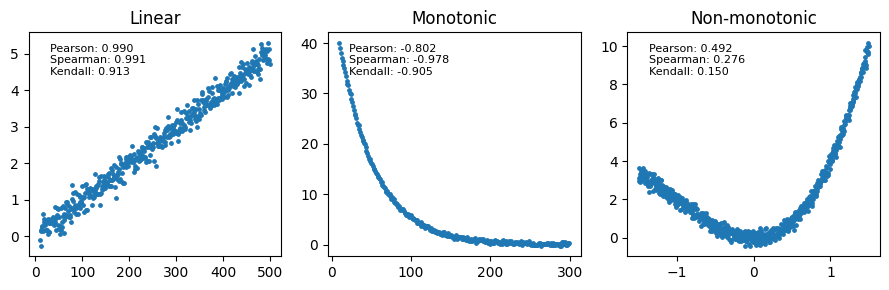

In [28]:
sigma = 1.0 / 5

# Generate data for each type of relationship
linear = [[u, (u) / 100 + sigma * np.random.randn()] for u in range(10, 500)]
monotonic = [[u, 50 * (0.8**(u / 10)) + sigma * np.random.randn()] for u in range(10, 300)]
non_monotonic = [[u, (u)**3 + 3 * u**2 + sigma * np.random.randn()] for u in np.arange(-1.5, 1.5, 1.0 / 250)]

# Combine the data
data = {
    "Linear": linear,
    "Monotonic": monotonic,
    "Non-monotonic": non_monotonic
}

# Create subplots
fig, axes = plt.subplots(1, len(data), figsize=(9, 3))

# Plot each relationship
for i, (title, model) in enumerate(data.items()):
    x = [point[0] for point in model]
    y = [point[1] for point in model]
    
    axes[i].scatter(x, y, s=6)
    
    # Calculate and display correlation coefficients
    pearson_corr = pearsonr(x, y)[0]
    spearman_corr = spearmanr(x, y)[0]
    kendall_corr = kendalltau(x, y)[0]
    
    axes[i].text(
        x=.085, y=.95,
        s=f"Pearson: {pearson_corr:.3f}\nSpearman: {spearman_corr:.3f}\nKendall: {kendall_corr:.3f}",
        fontsize=8,
        va='top',
        transform=axes[i].transAxes  # Specifies that x,y coordinates are for axis
    )
    axes[i].set_title(title)

plt.tight_layout();

While both Spearman's rho and Kendall's tau are valuable tools for assessing correlation, Kendall's tau might be preferred in situations with *smaller sample sizes*, increased concern about *outliers*, *frequent tied values*, specific theoretical considerations (e.g., survival analysis or studies of event ordering), or when *computational efficiency* is a priority.

## Statistical inference

### Testing for non-zero correlation

#### Calculating the t-statistic for correlation

Correlation coefficients provide a point estimate of the relationship between variables based on our sample data. However, we often want to go beyond the sample and infer whether a correlation exists in the *broader population*. Hypothesis testing allows us to do this.

To test for a non-zero correlation between two variables, we can use a **t-test**, similar to t-test we discussed in previous chapters about the [comparison of two unpaired means](https://sbwiecko.github.io/intuitive_biostatistics/30%20-%20Comparing%20Two%20Unpaired%20Means.html) and in [paired data](https://sbwiecko.github.io/intuitive_biostatistics/31%20-%20Comparing%20Paired%20Data.html). This test assesses whether the observed correlation in our sample is statistically significant, meaning it's unlikely to have occurred by chance if there were no correlation in the population. We can state the hypotheses as follows:

- Null hypothesis (H0): the population correlation coefficient is zero (no correlation).
- Alternative hypothesis (H1): the population correlation coefficient is not zero (correlation exists).

The test statistic for the t-test for correlation is defined as:

$$t = \frac{r}{\mathrm{SE}(r)} = r \sqrt{\frac{n-2}{1 - r^2}}$$

where:

- $r$ is the sample correlation coefficient,
- $n$ is the sample size.

Degrees of freedom represent the number of independent pieces of information available to estimate a parameter. In the context of the t-test for correlation, we are estimating the population correlation coefficient based on the sample correlation coefficient. To calculate the sample correlation coefficient, we first need to estimate two other parameters: the mean of $X$ and the mean of $Y$. These two estimated parameters reduce the degrees of freedom. Each data point provides one piece of information. However, since we've already estimated two parameters from the data, we lose two degrees of freedom, thus $\mathrm{DF} = n - 2$.

In [29]:
# Calculate the t-statistic and DF for correlation
n = len(df['per_C2022_fatacids'])  # Sample size
df_corr = n - 2                    # Degrees of freedom
t_stat_corr = pearson_r * np.sqrt((n - 2) / (1 - pearson_r**2)) # type: ignore

# Print the t-statistic
print(f"t-statistic for correlation = {t_stat_corr:.4f} with {df_corr} degrees of freedom")

t-statistic for correlation = 4.0026 with 11 degrees of freedom


#### P value

Having calculated the t-statistic and degrees of freedom, we can now determine the P value for the correlation. We'll use the t-distribution's cumulative distribution function (CDF) to compute the P value. This P value quantifies the probability of observing a correlation coefficient as extreme as the one calculated (or even more extreme) if the null hypothesis of no correlation were true.

In [30]:
from scipy.stats import t as t_dist

# Calculate the p-value (two-sided test)
p_value = 2 * (1 - t_dist.cdf(abs(t_stat_corr), df_corr))

# Print the results
print(f"P value for the correlation coefficient = {p_value:.5f}")

P value for the correlation coefficient = 0.00208


This low P value provides strong evidence against the null hypothesis, suggesting that there is a statistically significant correlation between the variables. More precisely, there is a 0.208% chance of obtaining a greater **absolute** correlation coefficient if the null hypothesis were true.

#### Visualizing t, critical and P values

We can visualize how the P and critical values are determined based on the t-statistic and the t-distribution.

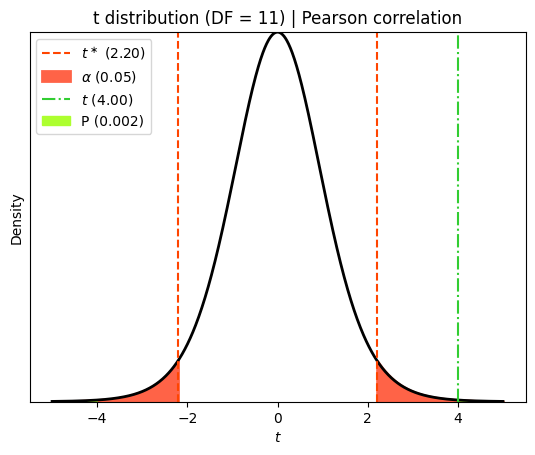

In [31]:
# Significance level (alpha)
alpha = 0.05

# Calculate critical t-values (two-tailed test)
t_crit_lower = t_dist.ppf(alpha / 2, df_corr)
t_crit_upper = t_dist.ppf(1 - alpha / 2, df_corr)

# Generate x values for plotting
x_t = np.linspace(-5, 5, 1000)
hx_t = t_dist.pdf(x_t, df_corr)

# Plot the t-distribution
plt.plot(x_t, hx_t, lw=2, color='black')

# Plot the critical t-values
plt.axvline(
    x=t_crit_lower, # type: ignore
    color='orangered',
    linestyle='--',)

plt.axvline(
    x=t_crit_upper, # type: ignore
    color='orangered',
    linestyle='--',
    label=fr"$t^\ast$ ({t_crit_upper:.2f})")

# Shade the rejection regions (alpha)
plt.fill_between(
    x_t[x_t <= t_crit_lower],
    hx_t[x_t <= t_crit_lower],
    linestyle="-",
    linewidth=2,
    color='tomato',
    label=fr"$\alpha$ ({alpha})")
plt.fill_between(
    x_t[x_t >= t_crit_upper],
    hx_t[x_t >= t_crit_upper],
    linestyle="-",
    linewidth=2,
    color='tomato')

# Plot the observed t-statistic
plt.axvline(
    x=t_stat_corr,
    color='limegreen',
    linestyle='-.',
    label=fr"$t$ ({t_stat_corr:.2f})")

# Shade the P value areas (two-tailed)
plt.fill_between(
    x_t[x_t <= -abs(t_stat_corr)],
    hx_t[x_t <= -abs(t_stat_corr)],
    color='greenyellow',
    label=f"P ({p_value:.3f})")
plt.fill_between(
    x_t[x_t >= abs(t_stat_corr)],
    hx_t[x_t >= abs(t_stat_corr)],
    color='greenyellow')

# Add labels and title
plt.xlabel(r"$t$")
plt.ylabel('Density')
plt.margins(x=0.05, y=0)
plt.yticks([])
plt.title(f"t distribution (DF = {df_corr}) | Pearson correlation")
plt.legend();

#### Effect size

While statistical significance (P value) tells us whether a correlation is likely to exist in the population, it doesn't tell us how strong the correlation is. That's where **effect size** comes in.

In correlation analysis, the correlation coefficient itself (Pearson's $r$, Spearman's $\rho$, or Kendall's $\tau$) serves as the effect size. It provides a standardized measure of the strength of the association between the variables:

- Small effect: $|r| = 0.1$
- Medium effect: $|r| = 0.3$
- Large effect: $|r|  = 0.5$

These are general guidelines, and the interpretation of effect size can vary depending on the specific research area and context.

It's important to recognize that a statistically significant correlation might have a small effect size, indicating that the relationship, while likely present in the population, might not be practically meaningful. However, effect size is crucial because it allows us to compare the strength of correlations across different studies or variables. This is why effect sizes are essential for meta-analysis, which combines the results of multiple studies.

(ci)=
### Confidence interval

A confidence interval provides a range of plausible values for the true population correlation coefficient based on the sample correlation coefficient. It gives us an idea of the *precision* of our estimate. Similarly to what we discussed for confidence intervals of a [proportion](https://sbwiecko.github.io/intuitive_biostatistics/04%20-%20Confidence%20Interval%20of%20a%20Proportion.html#), of [survival data](https://sbwiecko.github.io/intuitive_biostatistics/05%20-%20Confidence%20Interval%20of%20Survival%20Data.html), of [counted data](https://sbwiecko.github.io/intuitive_biostatistics/06%20-%20Confidence%20Interval%20of%20Counted%20Data%20%28Poisson%20Distribution%29.html), for the [confidence interval of a mean](https://sbwiecko.github.io/intuitive_biostatistics/12%20-%20Confidence%20Interval%20of%20a%20Mean.html), or for the mean difference when assessing the significance of [paired difference mean](https://sbwiecko.github.io/intuitive_biostatistics/31%20-%20Comparing%20Paired%20Data.html#p-value-and-confidence-interval) or [mean differences in unpaired data](https://sbwiecko.github.io/intuitive_biostatistics/30%20-%20Comparing%20Two%20Unpaired%20Means.html#welch-s-p-value-and-confidence-interval), we need to compute the **margin of error**, which is often based on the **standard error**. In the case of the confidence interval for the correlation coefficient, the margin of error is based on the standard error of the z-transformed correlation coefficient.

A common method for calculating confidence intervals for Pearson's correlation coefficient is to use [**Fisher's r-to-z transformation**](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#Using_the_Fisher_transformation). This transformation helps to normalize the sampling distribution of the correlation coefficient, especially when the correlation is not close to zero. It works as follows:

1. The correlation coefficient ($r$) is transformed to a z-score, also known as Fisher's Z-score, using the Fisher transformation:

    $$z = 1/2 \log\left(\frac{1 + r}{1 - r}\right) = \mathrm{arctanh}(r)$$

2. The standard error of the transformed z-score is calculated as $\mathrm{SE}_z = 1 / \sqrt{n - 3}$, where $n$ is the sample size.
3.  The confidence interval for the transformed z-score is calculated in the *z-space* using the **standard normal distribution**:

    $$\mathrm{CI}_z = z \pm z^\ast \times \mathrm{SE}_z$$

    where $z^\ast$, the critical value of $z$ at $\alpha / 2$, is obtained from the standard normal distribution based on the desired confidence level ($\alpha$).
4.  The confidence interval in z-space is back-transformed to the original correlation scale (*r-space*) using the inverse Fisher transformation:

    $$\mathrm{CI}_r = \frac{\exp(2 \mathrm{CI}_z) - 1}{\exp(2 \mathrm{CI}_z) + 1} = \mathrm{tanh}(\mathrm{CI}_z)$$

In [32]:
from scipy.stats import norm

# Fisher's r-to-z transformation
z = np.arctanh(pearson_r)  # type: ignore
# or 0.5 * np.log((1 + r) / (1 - r))
se = 1 / np.sqrt(n - 3)

# Calculate the confidence interval (e.g., 95% confidence)
confidence_level = 0.95
critical_z = norm.ppf((1 + confidence_level) / 2)
margin_of_error = critical_z * se
ci_z = (z - margin_of_error, z + margin_of_error)  # CI in z-space

# Back-transform to r-space
ci_r = np.tanh(ci_z)  # or ci_r_lower = (np.exp(2 * ci_z[0]) - 1) / (np.exp(2 * ci_z[0]) + 1)...

# Print the results
print(f"Pearson correlation coefficient: {pearson_r:.3f}")
print(f"95% confidence interval for the correlation: [{ci_r[0]:.4f}, {ci_r[1]:.4f}]")

Pearson correlation coefficient: 0.770
95% confidence interval for the correlation: [0.3804, 0.9275]


The [`pingouin` function `compute_esci`](https://pingouin-stats.org/build/html/generated/pingouin.compute_esci.html) computes the parametric confidence interval around a Pearson $r$ correlation coefficient by applying the Fisher's r-to-z transformation.

In [33]:
x=df['per_C2022_fatacids']
y=df['insulin_sensitivity']

print(
    "Parametric confidence intervals around Pearson r =",
    round(pg.compute_effsize(x, y, eftype='r'), 3), # type: ignore
    ":",
    pg.compute_esci(
        stat=pg.compute_effsize(x, y, eftype='r'),
        nx=n, ny=n, eftype='r'
    ),
    end=' '
)

Parametric confidence intervals around Pearson r = 0.77 : [0.38 0.93] 

Based on the calculated 95% confidence interval of [0.3804, 0.9275], we can be 95% confident that the true population correlation coefficient between %C20-22 fatty acids and insulin sensitivity falls within this range. This assumes that our data is a representative random sample from the larger population.

### Performing statistical inference in Python

As we've seen throughout this chapter, we can calculate correlation coefficients and perform statistical inference manually using Python libraries like NumPy, SciPy, and Pandas. However, there are also convenient functions available that streamline the process.

The [`pingouin` package offers a `corr` function](https://pingouin-stats.org/build/html/generated/pingouin.corr.html) that calculates correlation coefficients and provides additional information like P values and confidence intervals.

In [34]:
# Calculate Pearson correlation with P value and confidence interval
pg.corr(df['per_C2022_fatacids'], df['insulin_sensitivity'], method='pearson')

,n,r,CI95%,p-val,BF10,power
pearson,13,0.770003,"[0.38, 0.93]",0.002077,23.947,0.912954


The function also offers non-parametric methods such as Spearman and Kendall, as well as alternative hypothesis for one-sided test. Let's say we want to use Spearman correlation, and test if there is a *positive correlation* between the percentage of C20-20 fatty acids and insulin sensitivity in the population. We're specifically interested in whether the correlation is *greater than zero*.

In [35]:
pg.corr(df['per_C2022_fatacids'], df['insulin_sensitivity'], method='spearman', alternative='greater')

,n,r,CI95%,p-val,power
spearman,13,0.743804,"[0.41, 1.0]",0.001779,0.9322


## Bootstrapping and permutation tests for correlation analysis

As we've seen in previous chapters, [for example in paired t-test](https://sbwiecko.github.io/intuitive_biostatistics/31%20-%20Comparing%20Paired%20Data.html#bootstrapping-and-permutation-tests-for-paired-data), bootstrapping is a valuable tool for statistical inference, especially when dealing with *small sample sizes* or when the assumptions of traditional methods are not met. It allows us to estimate parameters and confidence intervals directly from the data without relying on strong distributional assumptions.

[Recent research has explored the application of bootstrap and permutation methods to correlation analysis](https://jmasm.com/index.php/jmasm/article/view/1069/1069), and these methods have been shown to provide valid and robust inferences for correlation coefficients, especially when dealing with small sample sizes or non-linear relationships. By resampling or permuting the data, we can estimate the sampling distribution of the correlation coefficient under the null hypothesis or construct confidence intervals without relying on parametric assumptions.

#### Generating bootstrap paired data

The core idea behind bootstrapping for correlation analysis is to treat the observed sample of *paired* data points as a miniature representation of the population. We [resample pairs of observations with replacement](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#Using_a_bootstrap), preserving the relationship between the two measurements within each pair.

Technically, this method involves resampling of $n$ $(x_i, y_i)$ pairs *with replacement* many times, and calculating the correlation coefficient for each resampled dataset. The empirical distribution of these resampled correlation coefficients is then used to approximate the sampling distribution of the statistic.

In [36]:
def draw_bs_pairs(x: np.array, y: np.array, func=pearsonr, size=1): # type: ignore
    """
    Perform pairs bootstrap for correlation and compute single statistics 
    from the replicates.

    This function performs pairs bootstrap resampling for correlation analysis.
    It takes two arrays (x and y) and a function (func) as input. It resamples
    pairs of data points from x and y with replacement and applies the 
    provided function to calculate a statistic (e.g., correlation coefficient) 
    for each bootstrap sample.

    Args:
      x: The first data array.
      y: The second data array.
      func: The function from scipy.stats to apply to the resampled data (default: pearsonr).
      size: The number of bootstrap replicates to generate (default: 1).

    Returns:
      An array of bootstrap replicates of the statistic.
    """
    # Set up array of indices to sample from
    inds = np.arange(len(x))

    # Initialize array to store bootstrap replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        # Resample indices with replacement
        bs_inds = np.random.choice(inds, len(inds), replace=True)
        
        # Get the resampled data (go by pairs)
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        
        # Calculate the statistic using the provided function
        bs_replicates[i], _ = func(bs_x, bs_y)  # Extract the correlation coefficient

    return bs_replicates

In [37]:
# Set random seed for reproducibility
np.random.seed(111)

# Set the number of replicates
B = 10_000

# Generate bootstrap replicates of Pearson's r
bs_replicates = draw_bs_pairs(
    df['per_C2022_fatacids'].to_numpy(),  # Make sure we send an array
    df['insulin_sensitivity'].to_numpy(),
    func=pearsonr,
    size=B)

# Print the 10 first replicates
print(bs_replicates[:10])

[0.76800734 0.75033014 0.75872762 0.83040812 0.84306196 0.75067324
 0.76837891 0.74724487 0.75046652 0.90883332]


We can also achieve the same result using a more concise and efficient "pythonic" implementation with list comprehension.

In [38]:
np.random.seed(111)
x=df['per_C2022_fatacids'].values
y=df['insulin_sensitivity'].values
inds=np.arange(len(x))

bs_replicates_b = np.array([
    pearsonr(x[bs_inds], y[bs_inds])[0]
    for bs_inds in np.random.choice(inds, size=(B, len(inds)), replace=True)
])

# Print the 10 first replicates
print(bs_replicates_b[:10])

[0.76800734 0.75033014 0.75872762 0.83040812 0.84306196 0.75067324
 0.76837891 0.74724487 0.75046652 0.90883332]


### Estimate of the confidence interval

Once we have the bootstrap distribution of correlation coefficients, we can estimate the confidence interval by finding the percentiles corresponding to the desired confidence level. For a 95% confidence interval, we typically use the 2.5th and 97.5th percentiles of the bootstrap distribution. This means that 95% of the bootstrapped correlation coefficients fall within this interval, providing a range of plausible values for the true population correlation coefficient.

In [39]:
# Calculate the 95% confidence interval using np.percentile
bs_ci = np.round(np.percentile(bs_replicates, [2.5, 97.5]), 3)

# Print the results
print(f"Bootstrap 95% CI estimate = {bs_ci}")

Bootstrap 95% CI estimate = [0.542 0.916]


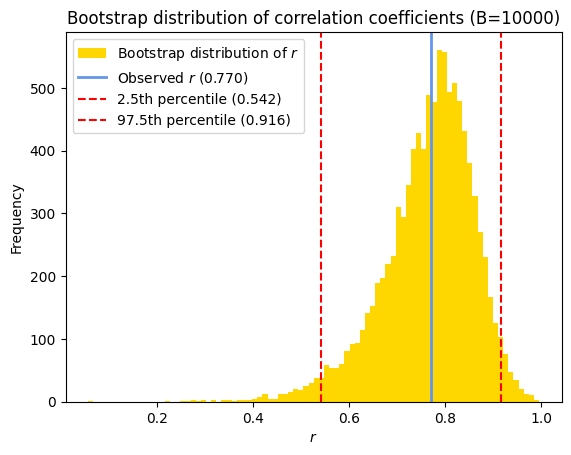

In [40]:
# Plot the histogram of the bootstrap distribution of correlation coefficients
plt.hist(
    bs_replicates,
    density=False,
    bins='auto',
    color='gold',
    label=r'Bootstrap distribution of $r$')

# Annotate the observed mean difference
plt.axvline(
    x=pearson_r,  # type: ignore
    color='cornflowerblue',
    linestyle='-', lw=2,
    label=fr'Observed $r$ ({pearson_r:.3f})')

# Add lines for the confidence interval
plt.axvline(
    x=bs_ci[0],
    color='red',
    linestyle='--',
    label=f'2.5th percentile ({bs_ci[0]:.3f})')
plt.axvline(
    x=bs_ci[1],
    color='red',
    linestyle='--',
    label=f'97.5th percentile ({bs_ci[1]:.3f})')

# Add labels and title
plt.xlabel(r'$r$')
plt.ylabel('Frequency')
plt.title(f"Bootstrap distribution of correlation coefficients (B={B})")
plt.legend();

Correlation coefficients have a bounded range (-1 to +1), so that, when the true correlation is near the boundaries, the bootstrap distribution can become *skewed* because it cannot extend beyond these limits. This is why we applied the [Fisher's r-to-z transformation for calculating the parametric confidence interval](ci). The skewness can affect the accuracy of the confidence interval calculated from the percentiles of the bootstrap distribution.

One solution would be to apply a transformation (like Fisher's r-to-z transformation) to the correlation coefficients before bootstrapping to help reducing skewness and improving the accuracy of the confidence interval. Let's take this opportunity to use the [`pingouin` function `compute_bootci`](https://pingouin-stats.org/build/html/generated/pingouin.compute_bootci.html) that computes bootstrapped confidence intervals of univariate and bivariate functions.

In [41]:
print("95% confidence interval (bootstrap with r-to-z transformation + backtransformation):")
np.tanh(
    pg.compute_bootci(
        x=df['per_C2022_fatacids'],
        y=df['insulin_sensitivity'],
        paired=True,  # Resample the pairs (x_i, y_i)
        # r-to-z transformation
        func=lambda x,y : np.arctanh(pearsonr(x, y)[0]), # type: ignore
        # func='pearson',  # Use pearsonr for normal correlation
        confidence=0.95,
        method='per',  # Simple percentile
        seed=111,
        n_boot=10000,
        return_dist=False,  # Set to False to only return the CI
    )
)

95% confidence interval (bootstrap with r-to-z transformation + backtransformation):


array([0.53704957, 0.91542046])

There are also [more advanced bootstrapping methods that adjusts for bias and skewness](https://besjournals.onlinelibrary.wiley.com/doi/pdf/10.1111/1365-2656.12382) in the bootstrap distribution, for example *bias-corrected and accelerated* (BCa) bootstrap. They can provide more accurate confidence intervals, especially when the distribution is skewed. The `scipy.stats.pearsonr` function natively returns a 'result' object associate to a `confidence_interval` method that can computes a bootstrap confidence interval of the correlation coefficient statistic using the [`scipy.stats.bootstrap`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html#scipy.stats.bootstrap).

In [42]:
from scipy.stats import BootstrapMethod

method = BootstrapMethod(method='BCa', random_state=111)
res = pearsonr(df['per_C2022_fatacids'], df['insulin_sensitivity'])
ci_bca = res.confidence_interval(confidence_level=.95, method=method)

print("95% confidence interval (BCa):\n", ci_bca)

95% confidence interval (BCa):
 ConfidenceInterval(low=0.5252399567436714, high=0.9081916163196986)


(permutations)=
### P value using permutation

Bootstrapping and permutation tests offer flexibility in testing hypotheses about correlation. We can manipulate the data to simulate the null hypothesis of no correlation, allowing us to calculate P values. The choice of test statistic in correlation analysis often depends on the specific hypothesis and the nature of the data. Common test statistics include the correlation coefficient Pearson's $r$, Spearman's $\rho$, or Kendall's $\tau$. But the flexibility of resampling methods allows us to explore other relevant statistics as well.

**Permutation** tests are a common resampling method for hypothesis testing in correlation analysis. In this approach, we randomly shuffle the values of one of the variables while keeping the other variable fixed. This *shuffling* breaks the association between the variables, simulating the null hypothesis of no correlation. By calculating the correlation coefficient for each permuted dataset, we generate a permutation distribution of correlation coefficients under the null hypothesis. We can then compare the observed correlation from our original data to this permutation distribution to assess its significance (P value).

In [43]:
def permute_for_correlation(x, y):
    """
    Generates a permuted sample for correlation analysis 
    under the null hypothesis of no association.

    Args:
      x: The first data array.
      y: The second data array.

    Returns:
      A new array with the values of x permuted randomly.
    """
    # Permute the values of x
    permuted_x = np.random.permutation(x)

    return permuted_x, y  # Return the permuted x and the original y

Next, we determine how frequently the correlation coefficients calculated from the permuted datasets are as extreme as, or even more extreme than, the observed correlation coefficient in our original data. This proportion represents the P value. In essence, it tells us the likelihood of observing a correlation as strong as the one we found, purely by chance, if there were truly no association between the variables (i.e., if the null hypothesis were true).

In [44]:
# Set random seed for reproducibility
np.random.seed(111)

# Generate 10,000 permutation replicates of the correlation coefficient
B = 10000
permuted_corrs = np.empty(B)

# Generate permuted correlation coefficients
for i in range(B):
    # Permute the data
    permuted_x, y = permute_for_correlation(df['per_C2022_fatacids'], df['insulin_sensitivity'])
    
    # Calculate the correlation coefficient for this permuted sample
    permuted_corrs[i] = pearsonr(permuted_x, y)[0]

# Print the first 6 replicate correlation coefficients
print(permuted_corrs[:6])

[-0.09216053  0.10482992 -0.06654712 -0.46068324  0.55469462  0.04537575]


In [45]:
# Same with a 'pythonic' implementation using list comprehension
np.random.seed(111)
x=df['per_C2022_fatacids'].values
y=df['insulin_sensitivity'].values

permuted_corrs_b = np.array([
    pearsonr(np.random.permutation(x), y)[0] # type: ignore
    for _ in range(B)
])

print(permuted_corrs_b[:6])

[-0.09216053  0.10482992 -0.06654712 -0.46068324  0.55469462  0.04537575]


In [46]:
# Calculate the P value using the distribution of Pearson's r replicates of permuted pairs,
# considering the direction of the observed correlation coefficient
if pearson_r >= 0: # type: ignore
    p_value_permutation = np.sum(permuted_corrs >= pearson_r) / len(permuted_corrs) # type: ignore
else:
    p_value_permutation = np.sum(permuted_corrs <= pearson_r) / len(permuted_corrs) # type: ignore

# Print the p-value
print(f"P value obtained using permutation test (mean difference) = {p_value_permutation:.4f}")

P value obtained using permutation test (mean difference) = 0.0012


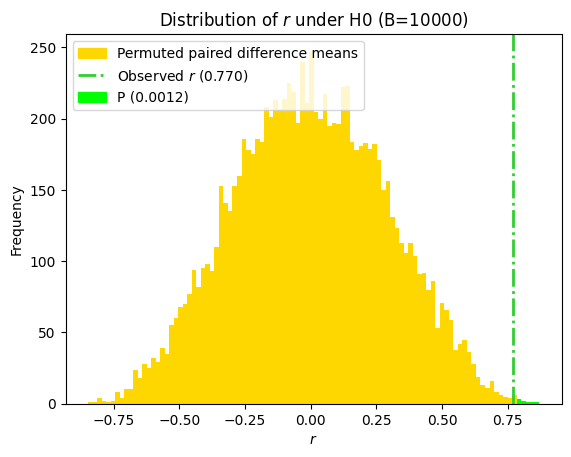

In [47]:
import matplotlib.patches as mpatches

# Plot the histogram of the Pearson r of shuffled pairs
hist, bins, patches = plt.hist(
    permuted_corrs,
    density=False,
    bins=int(B**.5),
    color='gold',
    # alpha=0.75,
    label=r'Permuted $r$')

# Annotate the observed mean difference
plt.axvline(
    x=pearson_r, # type: ignore
    color='limegreen',
    linestyle='-.', lw=2,
    label=fr"Observed $r$ ({pearson_r:.3f})")

# Determine the direction of the observed difference and plot accordingly
if pearson_r >= 0: # type: ignore
    # Plot the histogram of the mean differences >= observed mean difference 
    extreme_diffs = permuted_corrs[permuted_corrs >= pearson_r] # type: ignore
    # Change the color of the bars based on the direction parameter
    for i, bin_edge in enumerate(bins[:-1]):
        if np.any(bin_edge >= extreme_diffs):
            patches[i].set_facecolor('lime') # type: ignore
else:
    # Plot the histogram of the mean differences <= observed mean difference
    extreme_diffs = permuted_corrs[permuted_mean_diffs <= pearson_r] # type: ignore
    for i, bin_edge in enumerate(bins[:-1]):
        if np.any(bin_edge <= extreme_diffs):
            patches[i].set_facecolor('lime') # type: ignore

# Add labels and title
plt.xlabel(r'$r$')
plt.ylabel('Frequency')
plt.title(fr"Distribution of $r$ under H0 (B={B})")

# Create a copy of the original patch for the legend
original_patch = mpatches.Patch(color='gold', label='Permuted paired difference means')
# Create a patch for the legend
p_value_patch = mpatches.Patch(color='lime', label=f'P ({p_value_permutation:.4f})')

# Add the patches to the legend
plt.legend(handles=[original_patch, plt.gca().lines[0], p_value_patch]); # type: ignore

All the P values we calculated for the correlation between the percentage of C20-22 fatty acids and insulin sensitivity are considerably smaller than the typical significance level of 0.05. This indicates strong evidence to reject the null hypothesis of no correlation between the variables. Therefore, we can confidently conclude that there is a statistically significant correlation between the percentage of C20-22 fatty acids and insulin sensitivity.

The slightly different P values obtained from the various methods (parametric test, permutation test, bootstrapping) might reflect subtle differences in how these methods handle the data and estimate the P value. However, the overall conclusion of a statistically significant correlation remains consistent across all tests.

## Conclusion

In this chapter, we explored **correlation** analysis, a fundamental statistical method for understanding the relationship between continuous variables. We focused on **Pearson's correlation coefficient**, which measures the strength and direction of linear relationships, and discussed its **assumptions**, **interpretation**, and **statistical inference**. We also introduced **non-parametric** correlation coefficients like Spearman's rho and Kendall's tau, which are suitable for non-linear monotonic relationships.

We demonstrated how to calculate these correlation coefficients using Python libraries such as NumPy, SciPy, Pandas, and Pingouin. Additionally, we explored resampling methods like **bootstrapping** and **permutation** tests, which offer robust alternatives for statistical inference, especially when dealing with small sample sizes or violations of assumptions.

It's crucial to emphasize that *correlation does not imply causation*. Even if we observe a strong correlation between two variables, we cannot conclude that one variable causes the other. There might be other confounding factors or underlying relationships that explain the observed correlation. For example, if we find a positive correlation between ice cream sales and drowning incidents, it doesn't mean that eating ice cream causes drowning. Both variables might be influenced by a third factor, such as warm weather, which leads to increased ice cream consumption and more people swimming.

Therefore, it's essential to interpret correlation analysis cautiously and consider alternative explanations for the observed relationships. Further investigation, experimental studies, or more advanced statistical modeling might be needed to establish causal links between variables.

## Cheat sheet

### Descriptive statistics and visualization

```python
# Display descriptive statistics using pandas' describe()
import pandas as pd
df.describe()

# Display additional statistics using scipy
from scipy.stats import describe
describe(df[x])

# Scatter plot
import matplotlib.pyplot as plt
plt.scatter(df[x], df[y])

# Correlation matrix heatmap
import seaborn as sns
corr_matrix = df[[x, y, z]].corr()
sns.heatmap(corr_matrix)
```

### Assessing assumptions

```python
# Linearity
import pingouin as pg
model = pg.linear_regression(df[x], df[y])
residuals = model.residuals_
sns.residplot(x=df[x], y=residuals, lowess=True)

# Q-Q plot
pg.qqplot(df[x], dist='norm', confidence=0.95)

# Normality test
pg.normality(df[x])

# Homoscedasticity (divide the data into groups)
cutoff = df[x].median()
group1 = df[y][df[x] <= cutoff].to_numpy()
group2 = df[y][df[x] > cutoff].to_numpy()
pg.homoscedasticity([group1, group2], method='levene')

# Outliers
sns.stripplot(y=df[x])
sns.boxplot(y=df[x])
```

### Measures of correlation

```python
# Covariance
df.cov(ddof=1)
# same as np.cov(df[x], df[y])

# Pearson correlation coefficient
from scipy.stats import pearsonr
pearsonr(df[x], df[y])

# Spearman rank correlation coefficient
from scipy.stats import spearmanr
spearmanr(df[x], df[y])

# Kendall tau
from scipy.stats import kendalltau
kendalltau(df[x], df[y])
```

### Statistical inference

```python
# Calculate Pearson correlation with P value and confidence interval
pg.corr(df[x], df[y], method='pearson', alternative='two-sided')
```

### Bootstrapping and permutations

#### Bootstrap replicates and confidence intervals

```python
import numpy as np
# Generate B bootstrap replicates of the pearson r
# !Make sure to choose exactly N elements randomly **with replacement**
B = 10_000
x=df[x].values
y=df[y].values
inds=np.arange(len(x))

bs_replicates = np.array([
    pearsonr(x[bs_inds], y[bs_inds])[0]
    for bs_inds in np.random.choice(inds, size=(B, len(inds)), replace=True)
])

# Confidence interval
np.percentile(bs_replicates, [2.5, 97.5])
```

#### Bootstrap r-to-z transforms with pingouin

```python
bs_ci_z, bs_z = pg.compute_bootci(
    x=df[x],
    y=df[y],
    paired=True,  # Resample the pairs (x_i, y_i)
    func=lambda x,y : np.arctanh(pearsonr(x, y)[0]),
    method='per',
    return_dist=True)

# Back-transformation to the r-space
bs_ci_r = np.tanh(bs_ci_z)
```

#### BCa bootstrap with scipy

```python
from scipy.stats import BootstrapMethod

method = BootstrapMethod(method='BCa')
res = pearsonr(df[x], df[y])
ci_bca = res.confidence_interval(method=method)
```

#### P value using permutation

```python
# Generate B replicates of r from permutated pairs
B = 10_000
x=df[x].values
y=df[y].values

permuted_corrs = np.array([
    pearsonr(np.random.permutation(x), y)[0]
    for _ in range(B)
])

# Calculate the P value using the distribution of Pearson's r replicates of permuted pairs,
# considering the direction of the observed correlation coefficient
if pearson_r >= 0:
    p_value_permutation = np.sum(permuted_corrs >= pearson_r) / len(permuted_corrs)
else:
    p_value_permutation = np.sum(permuted_corrs <= pearson_r) / len(permuted_corrs)
```

## Session Information

The output below details all packages and version necessary to reproduce the results in this report.

In [48]:
!python --version
print("-------------")
# List of packages we want to check the version
packages = ['numpy', 'pandas', 'matplotlib', 'seaborn', 'scipy', 'pingouin']

# Initialize an empty list to store the versions
versions = []

# Loop over the packages
for package in packages:
    # Get the version of the package
    output = !pip show {package} | findstr "Version"
    # If the output is not empty, get the version
    if output:
        version = output[0].split()[-1]
    else:
        version = 'Not installed'
    # Append the version to the list
    versions.append(version)

# Print the versions
for package, version in zip(packages, versions):
    print(f'{package}: {version}')

Python 3.12.7
-------------
numpy: 1.26.4
pandas: 2.2.2
matplotlib: 3.9.2
seaborn: 0.13.2
scipy: 1.14.1
pingouin: 0.5.5
